<a href="https://colab.research.google.com/github/profitter261/Healthcare-AI-ML-App/blob/main/patient_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/CVD_cleaned[1].csv')
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [ ]:
df['General_Health'].unique()

array(['Poor', 'Very Good', 'Good', 'Fair', 'Excellent'], dtype=object)

In [ ]:
df['Age_Category'].unique()

array(['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49',
       '18-24', '30-34', '55-59', '35-39', '40-44', '25-29'], dtype=object)

In [ ]:
df.isnull().sum()

,0
General_Health,0
Checkup,0
Exercise,0
Heart_Disease,0
Skin_Cancer,0
Other_Cancer,0
Depression,0
Diabetes,0
Arthritis,0
Sex,0


In [ ]:
df.duplicated().sum()

np.int64(80)

In [ ]:
if df.duplicated().sum() > 0:
  df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [ ]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [ ]:
numerical = ['Alcohol_Consumption',	'Fruit_Consumption',	'Green_Vegetables_Consumption',	'FriedPotato_Consumption', 	'Height_(cm)',	'Weight_(kg)']
for col in numerical:
  print(df[col].unique())
  print(50 * '-')

[ 0.  4.  3.  8. 30.  2. 12.  1.  5. 10. 20. 17. 16.  6. 25. 28. 15.  7.
  9. 24. 11. 29. 27. 14. 21. 23. 18. 26. 22. 13. 19.]
--------------------------------------------------
[ 30.  12.   8.  16.   2.   1.  60.   0.   7.   5.   3.   6.  90.  28.
  20.   4.  80.  24.  15.  10.  25.  14. 120.  32.  40.  17.  45. 100.
   9.  99.  96.  35.  50.  56.  48.  27.  72.  36.  84.  26.  23.  18.
  21.  42.  22.  11. 112.  29.  64.  70.  33.  76.  44.  39.  75.  31.
  92. 104.  88.  65.  55.  13.  38.  63.  97. 108.  19.  52.  98.  37.
  68.  34.  41. 116.  54.  62.  85.]
--------------------------------------------------
[ 16.   0.   3.  30.   4.  12.   8.  20.   1.  10.   5.   2.   6.  60.
  28.  25.  14.  40.   7.  22.  24.  15. 120.  90.  19.  13.  11.  80.
  27.  17.  56.  18.   9.  21.  99.  29.  31.  45.  23. 100. 104.  32.
  48.  75.  36.  35. 112.  26.  50.  33.  96.  52.  76.  84.  34.  97.
  88.  98.  68.  92.  55.  95.  64. 124.  61.  65.  77.  85.  44.  39.
  70.  93. 128.  37.  53

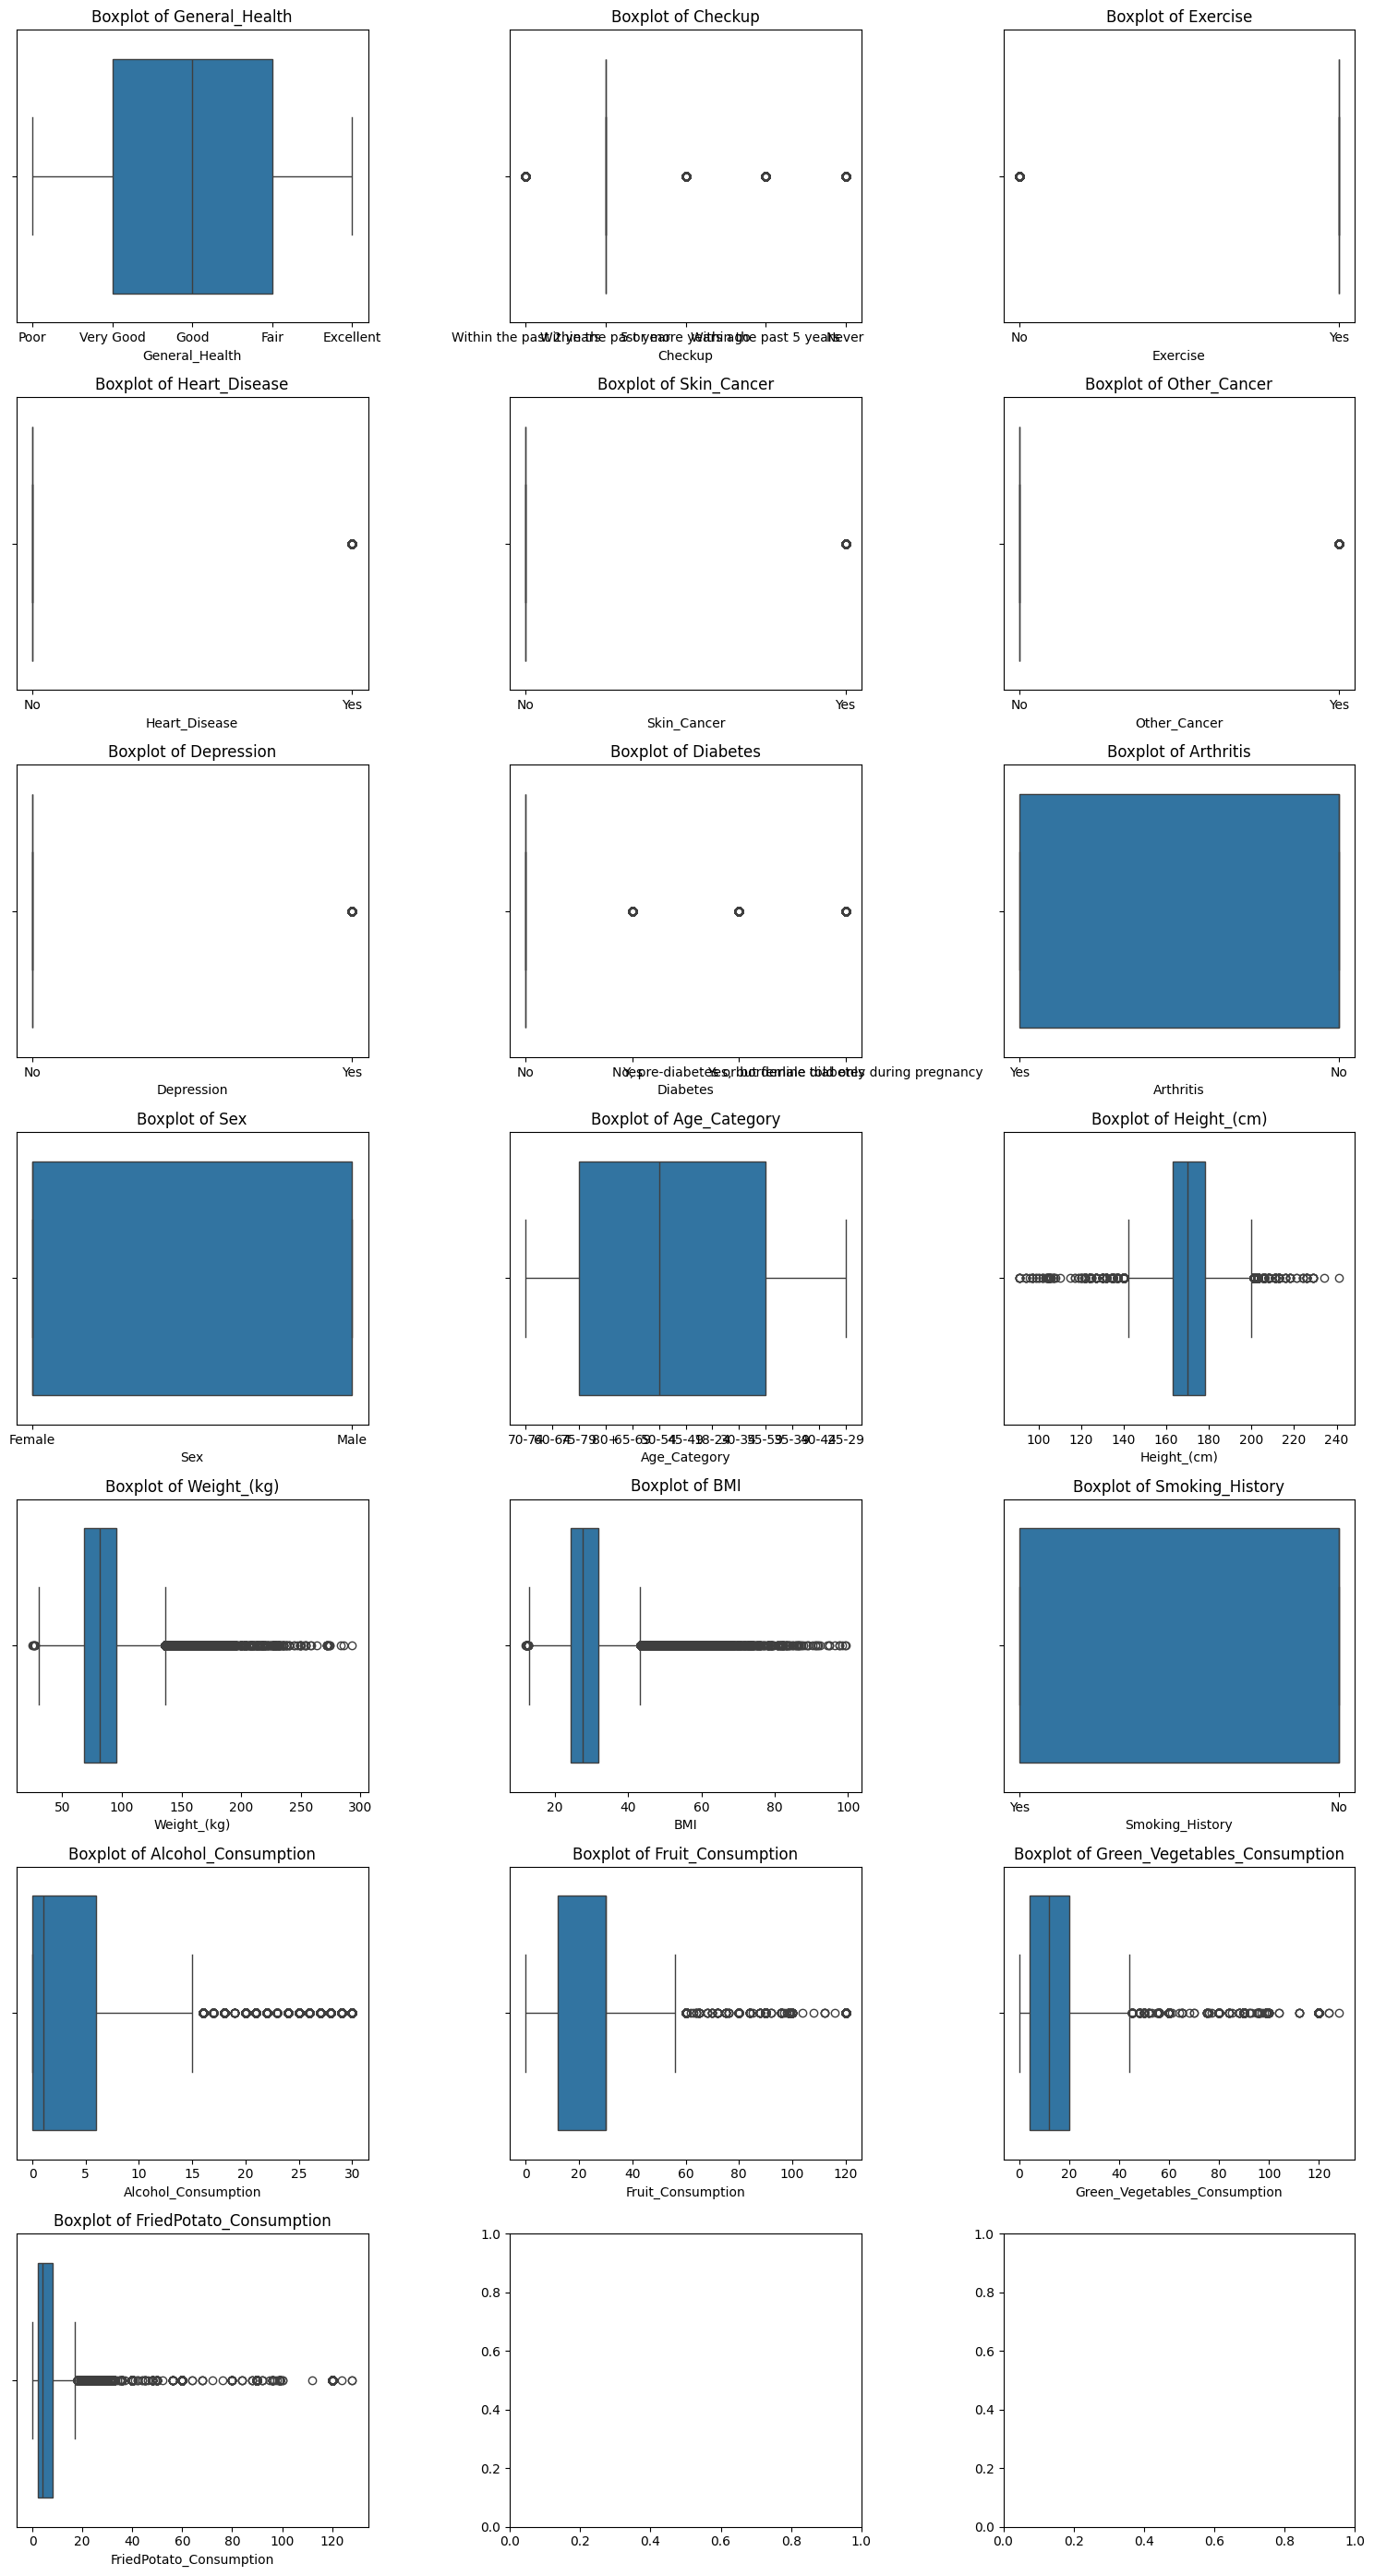

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
row = math.ceil(len(df.columns) / 3)
fig, ax = plt.subplots(row, 3, figsize=(15, row * 4))
i = 0

for col in df.columns:
    sns.boxplot(x=df[col], ax=ax.flatten()[i])
    ax.flatten()[i].set_title(f'Boxplot of {col}')
    i += 1

plt.tight_layout()
plt.show()

In [ ]:
def remove_outliers_iqr(df, columns=None):
    df_clean = df.copy()

    if columns is None:
        columns = df_clean[['Height_(cm)', 'Weight_(kg)', 'BMI','Alcohol_Consumption', 'Fruit_Consumption','Green_Vegetables_Consumption', 'FriedPotato_Consumption']]

    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean

## Remove outliers

### Subtask:
Remove the rows containing outliers from the DataFrame.

In [ ]:
df = remove_outliers_iqr(df)
print(df.shape)

(185737, 19)


In [ ]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185737 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                185737 non-null  object 
 1   Checkup                       185737 non-null  object 
 2   Exercise                      185737 non-null  object 
 3   Heart_Disease                 185737 non-null  object 
 4   Skin_Cancer                   185737 non-null  object 
 5   Other_Cancer                  185737 non-null  object 
 6   Depression                    185737 non-null  object 
 7   Diabetes                      185737 non-null  object 
 8   Arthritis                     185737 non-null  object 
 9   Sex                           185737 non-null  object 
 10  Age_Category                  185737 non-null  object 
 11  Height_(cm)                   185737 non-null  float64
 12  Weight_(kg)                   185737 non-null  fl

In [ ]:
for col in df.columns:
  if df[col].dtype == 'object':
    print(df[col].unique())

['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']
['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']
['Yes' 'No']
['Female' 'Male']
['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '30-34' '55-59'
 '18-24' '35-39' '40-44' '25-29']
['Yes' 'No']


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in ['Exercise', 'Skin_Cancer', 'Other_Cancer', 'Sex', 'Heart_Disease', 'Smoking_History', 'Depression', 'Arthritis']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [ ]:
general_health_Map={'Poor':0,'Fair':1,'Good':2,'Very Good':3,'Excellent':4}
df['General_Health']=df['General_Health'].map(general_health_Map)


checkup_Map={ 'Within the past year': 4,
    'Within the past 2 years': 3,
    'Within the past 5 years': 2,
    '5 or more years ago': 1,
    'Never': 0}

df['Checkup']=df['Checkup'].map(checkup_Map)


age_order = [
    '18-24', '25-29', '30-34', '35-39', '40-44', '45-49',
    '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+'
]

age_mapping = {age: idx for idx, age in enumerate(age_order)}
df['Age_Category'] = df['Age_Category'].map(age_mapping)

diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 1,
    'Yes, but female told only during pregnancy': 1,
    'Yes': 2
}

df['Diabetes'] = df['Diabetes'].map(diabetes_mapping)

In [ ]:
x_train=df[['Sex', 'Age_Category', 'Exercise', 'Smoking_History',
    'Alcohol_Consumption', 'Fruit_Consumption',
    'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
    'General_Health', 'Checkup', 'BMI']]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

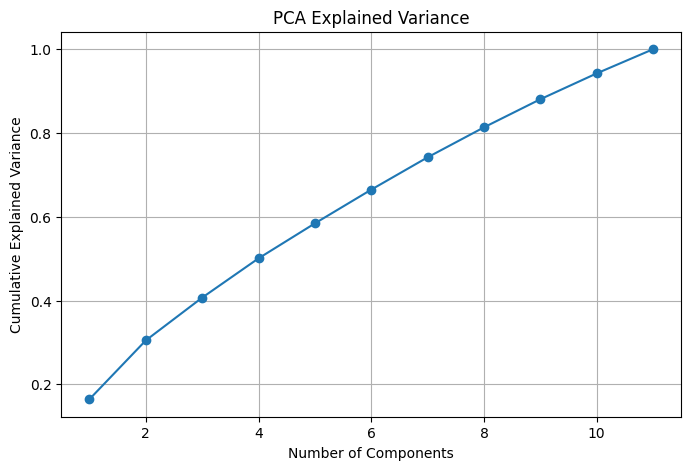

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA().fit(x_train_scaled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(x_train_scaled)

print(f'Number of Components selected: {X_pca.shape[1]}')

Number of Components selected: 10


In [ ]:
from sklearn.cluster import KMeans

interia=[]
k=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X_pca)
  interia.append(kmeans.inertia_)
  k.append(i)

Text(0.5, 1.0, 'The Elbow Method')

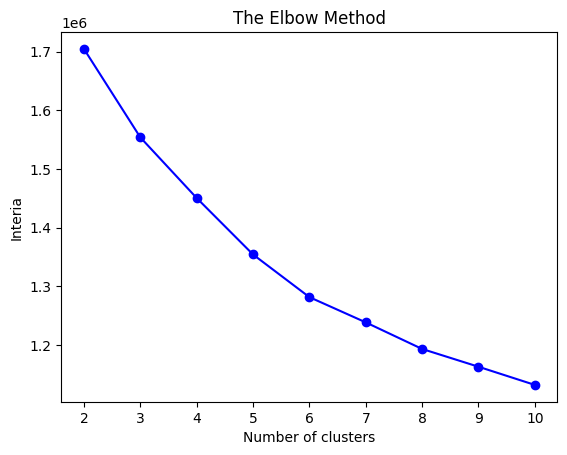

In [ ]:
plt.plot(k,interia,'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Interia')
plt.title('The Elbow Method')

In [ ]:
from sklearn.metrics import silhouette_score
scores=[]
k=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X_pca)
  scores.append(silhouette_score(X_pca,kmeans.labels_))
  print(i,scores[-1])
  k.append(i)

2 0.11247923558912191
3 0.10942651000396514
4 0.10308285961141245
5 0.11487792106707004
6 0.11221502025608741
7 0.10360455604974478
8 0.11179142122790645
9 0.10071616312799712
10 0.10202112518931292


In [ ]:
pca = PCA(n_components=3)
X_pca_2d = pca.fit_transform(x_train_scaled)

print(f'Number of Components selected: {X_pca_2d.shape[1]}')

Number of Components selected: 3


<Axes: >

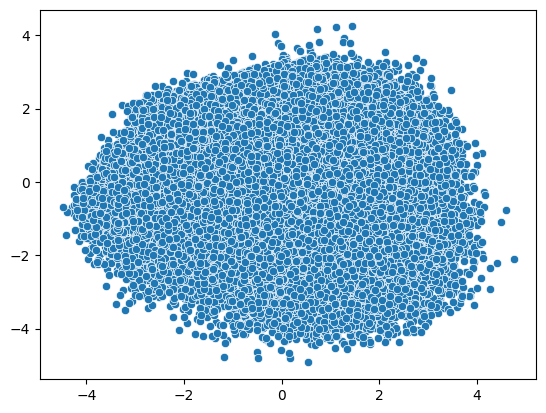

In [ ]:
sns.scatterplot(x=X_pca_2d[:,0],y=X_pca_2d[:,1])

In [ ]:
import umap
reducer = umap.UMAP(n_components=7, min_dist=0.05, n_neighbors=20, random_state=42)
X_umap = reducer.fit_transform(x_train_scaled)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


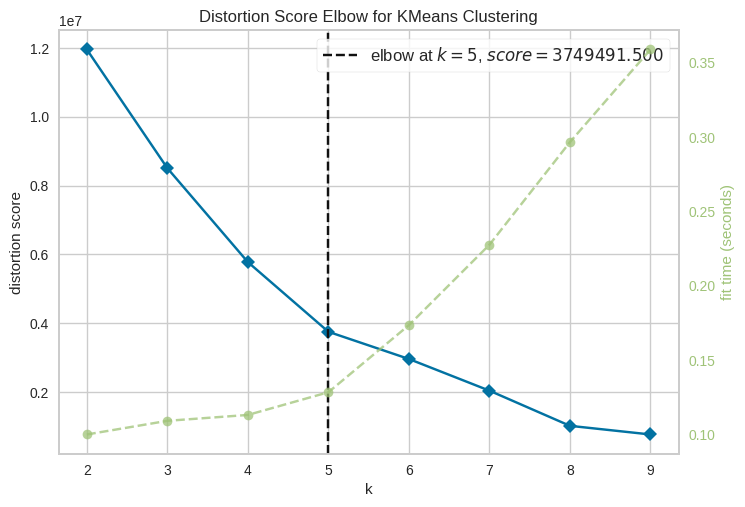

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(X_umap)
visualizer.show()

In [ ]:
scores=[]
k=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X_umap)
  scores.append(silhouette_score(X_umap,kmeans.labels_))
  print(i,scores[-1])
  k.append(i)

2 0.28023118
3 0.42041415
4 0.53435075
5 0.6355989
6 0.6649756
7 0.71485764


Text(0.5, 1.0, 'The Elbow Method')

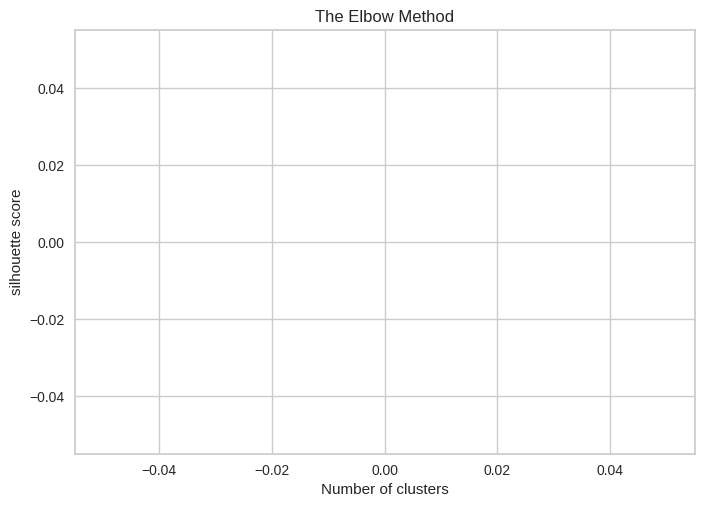

In [ ]:
plt.plot(k,scores,'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.title('The Elbow Method')

In [ ]:
kmeans=KMeans(n_clusters=8,init='k-means++',random_state=42)
kmeans.fit(X_umap)

KMeans(random_state=42)

In [ ]:
silhouette_score(X_umap,kmeans.labels_)

np.float32(0.7765134)

<Axes: >

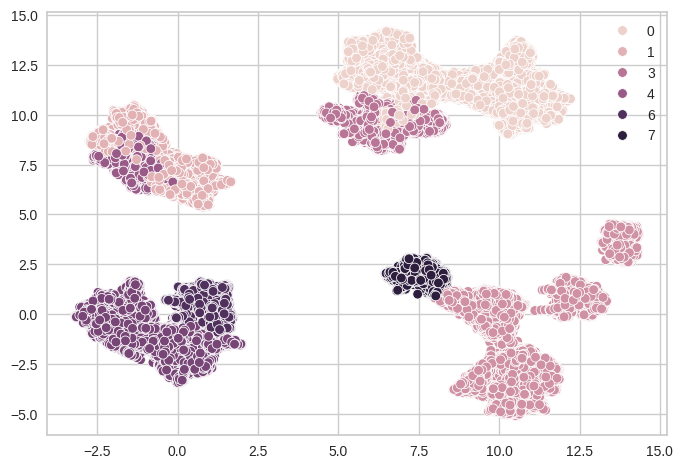

In [ ]:
reducer = umap.UMAP(n_components=3)
X_umap_3d = reducer.fit_transform(x_train_scaled)
sns.scatterplot(x=X_umap_3d[:,0],y=X_umap_3d[:,1],hue=kmeans.labels_)

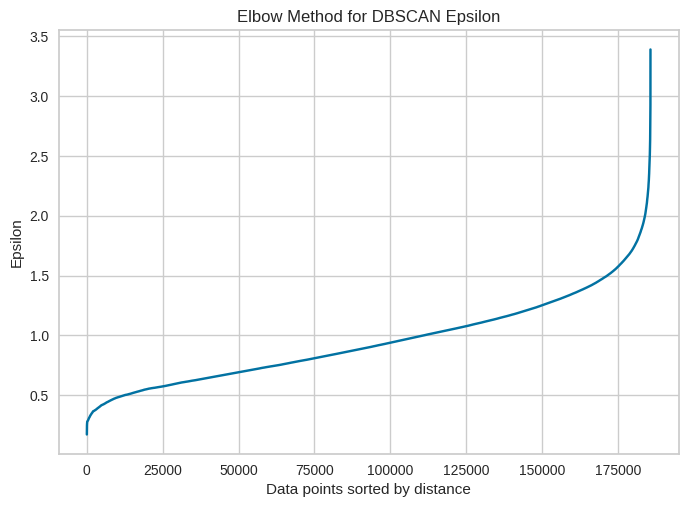

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Find the optimal eps
neighbors = NearestNeighbors(n_neighbors=2*x_train_scaled.shape[1])
neighbors_fit = neighbors.fit(x_train_scaled)
distances, indices = neighbors_fit.kneighbors(x_train_scaled)

distances = np.sort(distances[:, x_train_scaled.shape[1]-1], axis=0)
plt.plot(distances)
plt.xlabel('Data points sorted by distance')
plt.ylabel('Epsilon')
plt.title('Elbow Method for DBSCAN Epsilon')
plt.show()

Based on the elbow plot above, choose an appropriate `eps` value.

In [ ]:
# Perform DBSCAN with the chosen eps and min_samples (a common rule of thumb is 2*n_features)
dbscan = DBSCAN(eps=0.5, min_samples=2*x_train_scaled.shape[1]) # Replace 0.5 with the chosen eps value
dbscan.fit(x_train_scaled)

# Get the cluster labels
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

Estimated number of clusters: 54
Estimated number of noise points: 177291


You can adjust `eps` and `min_samples` to optimize the clustering results.

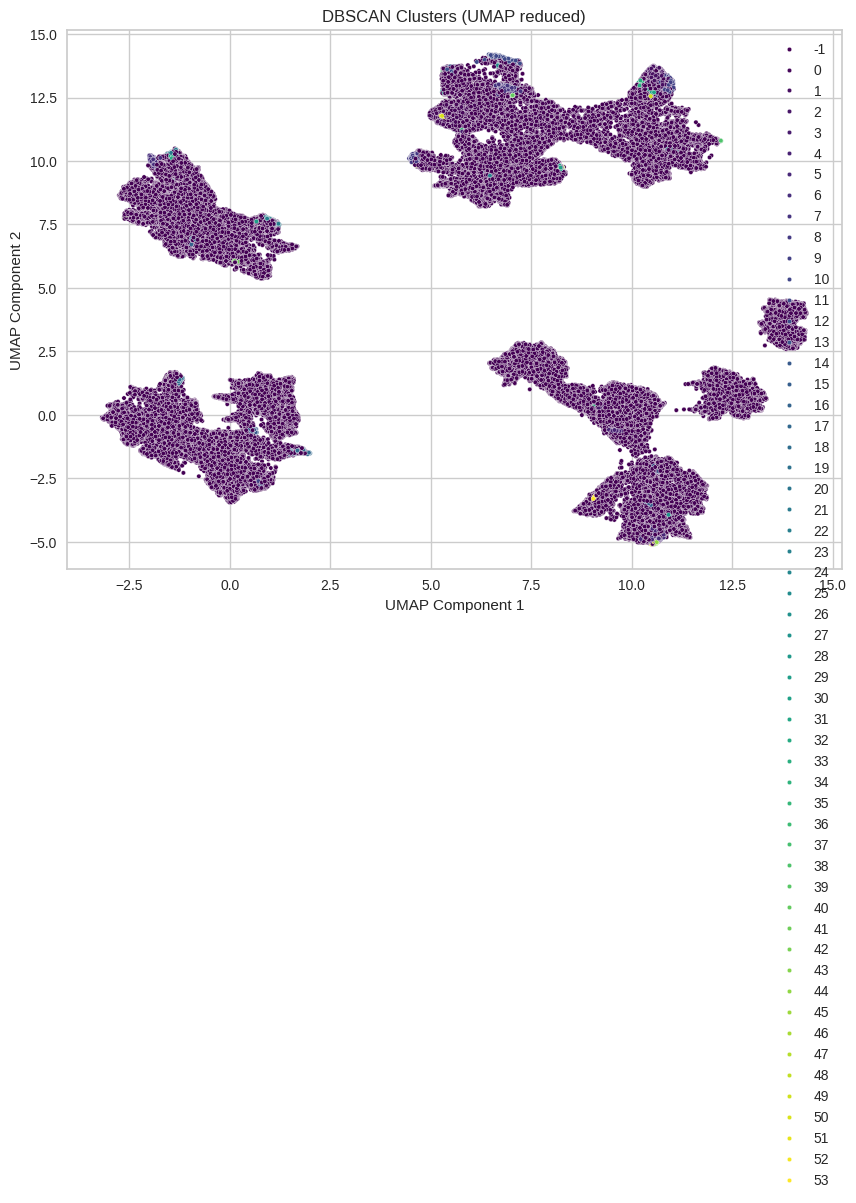

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_umap_3d[:,0], y=X_umap_3d[:,1], hue=labels, palette='viridis', legend='full', s=10)
plt.title('DBSCAN Clusters (UMAP reduced)')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

In [ ]:
df['KMeans_Cluster'] = kmeans.labels_
df['DBSCAN_Cluster'] = labels

display(df.head())

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,KMeans_Cluster,DBSCAN_Cluster
0,0,3,0,0,0,0,0,0,1,0,...,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0,4,-1
1,3,4,0,1,0,0,0,2,0,0,...,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0,3,-1
2,3,4,1,0,0,0,0,2,0,0,...,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0,0,-1
3,0,4,1,1,0,0,0,2,0,1,...,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0,2,-1
4,2,4,0,0,0,0,0,0,0,1,...,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0,6,-1


<Axes: >

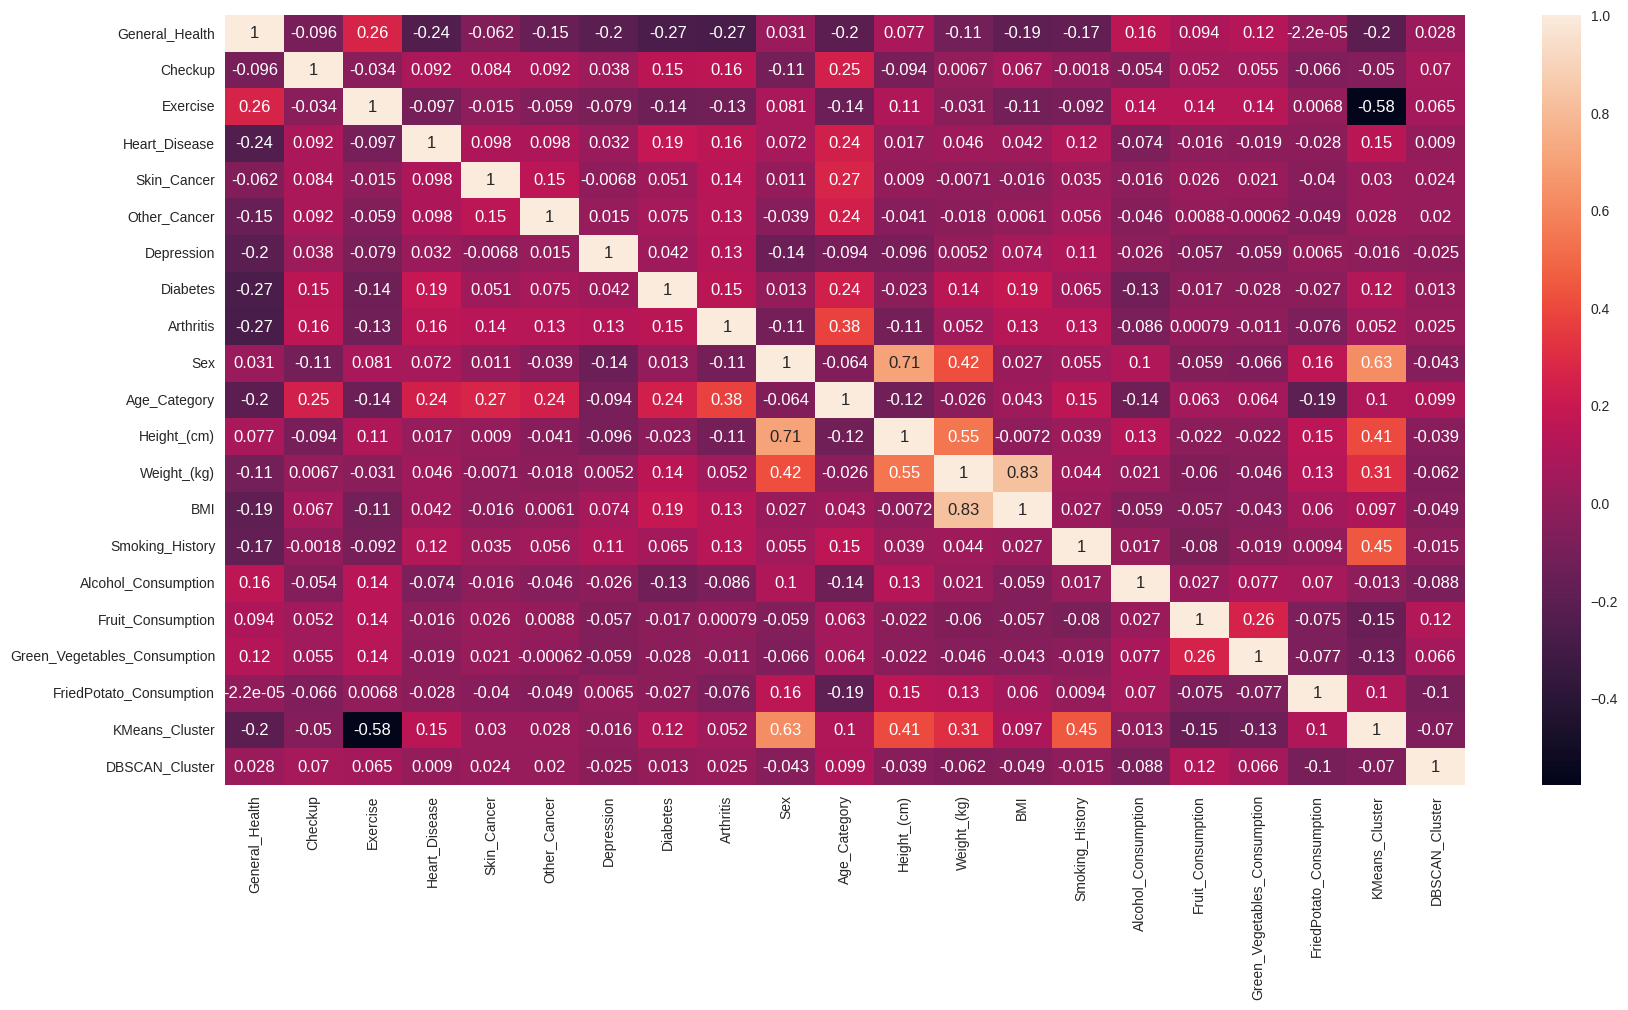

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='KMeans_Cluster', ylabel='count'>

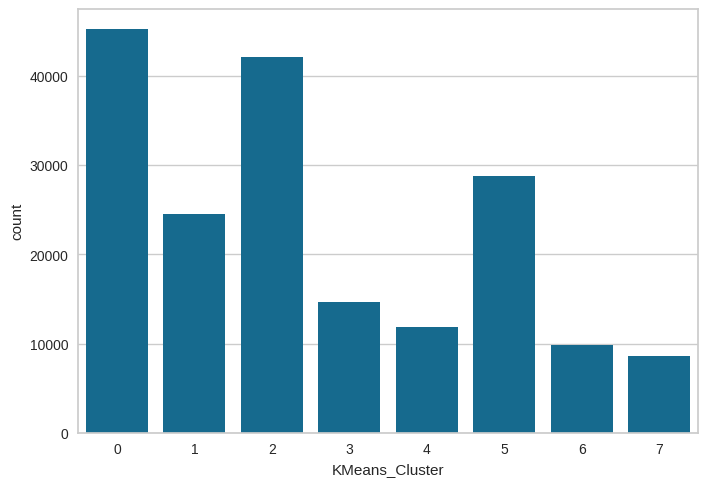

In [ ]:
sns.countplot(x='KMeans_Cluster',data=df)

In [ ]:
df['KMeans_Cluster'].value_counts()

,count
KMeans_Cluster,
0,45232
2,42170
5,28806
1,24512
3,14630
4,11909
6,9878
7,8600


In [ ]:
x_cluster=df.drop(['Heart_Disease','Diabetes', 'Other_Cancer','Skin_Cancer', 'Arthritis', 'Depression','KMeans_Cluster','Height_(cm)','Weight_(kg)'],axis=1)
y_cluster=df['KMeans_Cluster']
x_cluster

,General_Health,Checkup,Exercise,Sex,Age_Category,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,DBSCAN_Cluster
0,0,3,0,0,10,14.54,1,0.0,30.0,16.0,12.0,-1
1,3,4,0,0,10,28.29,0,0.0,30.0,0.0,4.0,-1
2,3,4,1,0,8,33.47,0,4.0,12.0,3.0,16.0,-1
3,0,4,1,1,11,28.73,0,0.0,30.0,30.0,8.0,-1
4,2,4,0,1,12,24.37,1,0.0,8.0,4.0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
308848,2,2,1,1,7,20.98,0,0.0,16.0,12.0,0.0,-1
308849,3,4,1,1,1,29.05,0,4.0,30.0,8.0,0.0,-1
308851,3,1,1,0,2,24.69,1,4.0,40.0,8.0,4.0,-1
308852,3,4,1,1,9,23.73,0,3.0,30.0,12.0,0.0,-1


In [ ]:
x_cluster = x_cluster.drop('DBSCAN_Cluster', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train_cluster,x_test_cluster,y_train_cluster,y_test_cluster=train_test_split(x_cluster,y_cluster,test_size=0.2,random_state=42)
scaler_cluster=StandardScaler()
x_train_cluster_scaled=scaler_cluster.fit_transform(x_train_cluster)
x_test_cluster_scaled=scaler_cluster.transform(x_test_cluster)

# Task
Train different classification models on the `x_train_cluster_scaled` and `y_train_cluster` data, incorporating class weights if necessary due to class imbalance, and evaluate their performance on the `x_test_cluster_scaled` and `y_test_cluster` data.

## Check for class imbalance

### Subtask:
Analyze the distribution of the target variable (`y_train_cluster`) to determine if class weights are necessary.


**Reasoning**:
To determine if class weights are necessary, I need to analyze the distribution of the target variable, which is in `y_train_cluster`. Calculating and printing the value counts will show the frequency of each class.



In [ ]:
print(y_train_cluster.value_counts())

KMeans_Cluster
0    36179
2    33729
5    23058
1    19565
3    11763
4     9527
6     7910
7     6858
Name: count, dtype: int64


## Calculate class weights

### Subtask:
If class imbalance is present, calculate appropriate class weights to be used during model training.


**Reasoning**:
Calculate class weights using the compute_class_weight function and store them in a dictionary.



In [ ]:
from sklearn.utils import compute_class_weight
import numpy as np

classes = np.unique(y_train_cluster)
class_weights_array = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_cluster)
class_weights = dict(zip(classes, class_weights_array))
print(class_weights)

{np.int32(0): np.float64(0.5133813814643854), np.int32(1): np.float64(0.9493291592128802), np.int32(2): np.float64(0.5506722701532806), np.int32(3): np.float64(1.5789870781263282), np.int32(4): np.float64(1.9495775165319618), np.int32(5): np.float64(0.8055176077717061), np.int32(6): np.float64(2.3481194690265488), np.int32(7): np.float64(2.7083151064450277)}


## Define and train models

### Subtask:
Select and define different classification models (e.g., Logistic Regression, Support Vector Machine, Decision Tree, Random Forest, Gradient Boosting) and train them using the `x_train_cluster_scaled` and `y_train_cluster`, incorporating the calculated class weights.


**Reasoning**:
Import the necessary classification models and train them with the calculated class weights.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Logistic Regression
lr_model = LogisticRegression(class_weight=class_weights, max_iter=1000, random_state=42)
lr_model.fit(x_train_cluster_scaled, y_train_cluster)

# Support Vector Machine (SVC) - using a smaller subset for faster training
# SVC with class_weight can be computationally expensive on large datasets.
# For demonstration, we will train on a subset or consider a linear SVC.
# Let's use LinearSVC for better scalability or train on a smaller sample.
# Given the size of the dataset, LinearSVC is more appropriate.
from sklearn.svm import LinearSVC
svc_model = LinearSVC(class_weight=class_weights, max_iter=10000, random_state=42)
svc_model.fit(x_train_cluster_scaled, y_train_cluster)

# Decision Tree
dt_model = DecisionTreeClassifier(class_weight=class_weights, random_state=42)
dt_model.fit(x_train_cluster_scaled, y_train_cluster)

# Random Forest
rf_model = RandomForestClassifier(class_weight=class_weights, random_state=42)
rf_model.fit(x_train_cluster_scaled, y_train_cluster)

# Gradient Boosting (does not support class_weight directly, can use sample_weight or adjust loss function)
# For now, we'll train without explicit class_weight, and note this limitation.
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(x_train_cluster_scaled, y_train_cluster)

print("Models trained successfully.")

Models trained successfully.


## Evaluate models

### Subtask:
Evaluate the performance of each trained model using appropriate metrics (e.g., accuracy, precision, recall, F1-score, confusion matrix) on the `x_test_cluster_scaled` and `y_test_cluster`.


**Reasoning**:
Evaluate the performance of each trained model using various metrics on the test data.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

models = {
    'Logistic Regression': lr_model,
    'Linear SVC': svc_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model
}

for name, model in models.items():
    print(f"Evaluating {name}:")
    y_pred = model.predict(x_test_cluster_scaled)

    accuracy = accuracy_score(y_test_cluster, y_pred)
    precision = precision_score(y_test_cluster, y_pred, average='weighted')
    recall = recall_score(y_test_cluster, y_pred, average='weighted')
    f1 = f1_score(y_test_cluster, y_pred, average='weighted')
    cm = confusion_matrix(y_test_cluster, y_pred)

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")
    print("  Confusion Matrix:")
    print(cm)
    print("-" * 30)

Evaluating Logistic Regression:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  Confusion Matrix:
[[9052    0    0    1    0    0    0    0]
 [   0 4947    0    0    0    0    0    0]
 [   0    0 8441    0    0    0    0    0]
 [   0    0    0 2867    0    0    0    0]
 [   0    0    0    0 2382    0    0    0]
 [   0    0    0    0    0 5748    0    0]
 [   0    0    0    0    0    0 1968    0]
 [   0    0    0    0    0    0    0 1742]]
------------------------------
Evaluating Linear SVC:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  Confusion Matrix:
[[9052    0    0    1    0    0    0    0]
 [   0 4947    0    0    0    0    0    0]
 [   0    0 8441    0    0    0    0    0]
 [   0    0    0 2867    0    0    0    0]
 [   0    0    0    0 2382    0    0    0]
 [   0    0    0    0    0 5748    0    0]
 [   0    0    0    0    0    0 1968    0]
 [   0    0    0    0    0    0    0 1742]]
------------------------------
Eva

## Compare models

### Subtask:
Compare the performance of the different models to determine which one performs best.


## Summary:

### Data Analysis Key Findings

*   The training data exhibits significant class imbalance, with the most frequent class having 36,179 instances and the least frequent class having 6,858 instances.
*   Class weights were successfully calculated using the `compute_class_weight` function with the 'balanced' option to address the class imbalance.
*   Logistic Regression, Linear SVC, Decision Tree, Random Forest, and Gradient Boosting models were trained on the scaled training data. Class weights were incorporated into the training of Logistic Regression, Linear SVC, Decision Tree, and Random Forest.
*   All trained models achieved near-perfect performance on the test data, with accuracy, precision, recall, and F1-scores all close to 1.0000.
*   The confusion matrices for all models showed minimal misclassifications, indicating excellent classification performance.

### Insights or Next Steps

*   Since all models performed exceptionally well on the test data, further comparison could consider factors like training time, prediction speed, or model interpretability to select the most suitable model for deployment.
*   Investigate the reason behind the extremely high performance on the test set. This could indicate data leakage or that the clusters are highly separable.


In [ ]:
import pickle

# Choose the best model (e.g., Random Forest based on previous evaluation)
best_model = rf_model

# Define the filename for the pickled model
filename = 'patient_clustering_best_model.pkl'

# Open the file in write binary mode
with open(filename, 'wb') as f:
    # Pickle the model and save it to the file
    pickle.dump(best_model, f)

print(f"Best model (Random Forest) pickled successfully as '{filename}'")

Best model (Random Forest) pickled successfully as 'patient_clustering_best_model.pkl'


In [ ]:
import pickle

# Define the filename of the pickled model
filename = 'patient_clustering_best_model.pkl'

# Open the file in read binary mode
with open(filename, 'rb') as f:
    # Load the model from the file
    loaded_model = pickle.load(f)

print("Model loaded successfully:")
print(loaded_model)

FileNotFoundError: [Errno 2] No such file or directory: 'patient_clustering_best_model.pkl'

In [ ]:
# Use the loaded model to make predictions on the test data
predictions = loaded_model.predict(x_test_cluster_scaled)

# Display the first few predictions
print("Predictions from the loaded model:")
print(predictions[:10])

Predictions from the loaded model:
[0 2 0 5 2 0 1 7 1 5]
